# Buffon's Needle

In [10]:
import numpy as np

def drop_needle(n=100):
    return np.c_[
                 np.random.uniform(low=0.0, high=1/2, size=n),
                 np.random.uniform(low=0.0, high=np.pi/2, size=n)
                ]

drop_needle(n=10)

array([[0.26667899, 0.21642603],
       [0.19820161, 1.0613306 ],
       [0.31927154, 1.46328105],
       [0.19327295, 0.96069707],
       [0.14418484, 0.08787517],
       [0.26460794, 1.55197477],
       [0.4185071 , 1.49475863],
       [0.35568265, 1.03417208],
       [0.13258247, 0.21229832],
       [0.45008707, 1.08678685]])

In [21]:
error = 0.0001
n = int(1/error**2)
needles = drop_needle(n=n)

In [22]:
needles_crossing = needles[:,0] < (1/2 * np.sin(needles[:,1]))
2 / needles_crossing.sum()

3.1417147076735e-08

## Exercises

3. Alter the program MonteCarlo to estimate the area of the circle of radius 1/2 with center at (1/2, 1/2) inside the unit square by choosing 1000 points at random. Compare your results with the true value of π/4. Use your results to estimate the value of π. How accurate is your estimate?

$\sqrt{(x - x_1)^2 + (y - y_1)^2} = r$

In [10]:
import numpy as np
dots = np.random.uniform(0,1,(1000,2))
def in_circle(points):
    x,y = points[:,0],points[:,1]
    return np.sqrt((x-1/2)**2 + (y - 1/2)**2) <= 1/2

in_circle(dots).sum() / len(dots)

0.79

In [11]:
np.pi/4

0.7853981633974483

4. Alter the program MonteCarlo to estimate the area under the graph of $y = \sin(πx)$ inside the unit square by choosing 10,000 points at random. Now calculate the true value of this area and use your results to  stimate the value of $π$. How accurate is your estimate?

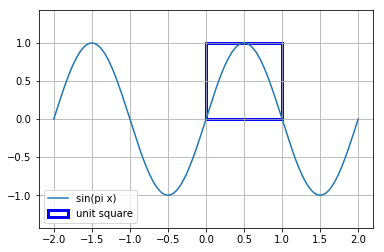

In [34]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
x = np.linspace(-2,2,1000)
y = np.sin(np.pi * x)
plt.plot(x,y, label='sin(pi x)')

rect = patches.Rectangle((0,0),1,1,fill=False,linewidth=3,color='b', label='unit square')
plt.gca().add_patch(rect)
plt.grid()
plt.axis('equal')
plt.legend()
plt.show()

In [40]:
dots = np.random.uniform(0,1,(100000, 2))

def under_curve(points):
    x,y = points[:,0],points[:,1]
    return y <= np.sin(np.pi * x)

under_curve(dots).sum() / len(dots)

0.63721

The true area is: 
$\int_{0}^{1} \sin(\pi x) \,dx = - \frac{\cos(\pi x)}{\pi} \Big|_0^1 = \frac{2}{\pi} \approx 0.6366197723675814$ 

7. For Buffon’s needle problem, Laplace considered a grid with horizontal and vertical lines one unit apart. He showed that the probability that a needle of length L ≤ 1 crosses at least one line is
<center>$p = \frac{4L - L^2}{\pi}$</center>
To simulate this experiment we choose at random an angle θ between 0 and π/2 and independently two numbers d 1 and d 2 between 0 and L/2. (The two numbers represent the distance from the center of the needle to the nearest horizontal and vertical line.) The needle crosses a line if either d 1 ≤ (L/2) sin or d 2 ≤ (L/2) cos θ. We do this a large number of times and estimate π as:
<center>$\hat\pi = \frac{4L-L^2}{a}$</center>  
where a is the proportion of times that the needle crosses at least one line. Write a program to estimate π by this method, run your program for 100, 1000, and 10,000 experiments, and compare your results with Buffon’s method described in Exercise 6. (Take L = 1.)

In [92]:
L = 1
needles = np.concatenate([np.random.uniform(0,np.pi/2, (10000,1)),
                          np.random.uniform(0,L/2, (10000,1)),
                          np.random.uniform(0,L/2, (10000,1))
                         ], axis=1)
needles.shape

(10000, 3)

In [95]:
def crossing_line(needles):
    theta,d1,d2 = np.split(needles,3,axis=1)
    return ((d1 <= (L/2) * np.sin(theta)) 
            | (d2 <= (L/2) * np.cos(theta))
           )

a = crossing_line(needles).sum() / len(needles)
pi_hat = (4 * L - L ** 2) / a
pi_hat

3.141690229343387

In [96]:
np.pi

3.141592653589793

9. A large number of waiting time problems have an exponential distribution of 
outcomes. We shall see (in Section 5.2) that such outcomes are simulated by
computing (−1/λ) log(rnd), where λ > 0. For waiting times produced in this
way, the average waiting time is 1/λ. For example, the times spent waiting for
a car to pass on a highway, or the times between emissions of particles from a
radioactive source, are simulated by a sequence of random numbers, each of
which is chosen by computing (−1/λ) log(rnd), where 1/λ is the average time
between cars or emissions. Write a program to simulate the times between
cars when the average time between cars is 30 seconds. Have your program
compute an area bar graph for these times by breaking the time interval from
0 to 120 into 24 subintervals. On the same pair of axes, plot the function
$f (x) = (1/30)e^{−(1/30)x}$ . Does the function fit the bar graph well?

In [118]:
avg_time = 30 # seconds
lambda_ = 1/avg_time
rnd = np.random.uniform(size=10000)
car_times = (-1/lambda_) * np.log(rnd)

x = np.linspace(0, 120, 10000)
car_times_theory = (1/30) * np.exp(-1/30 * x)

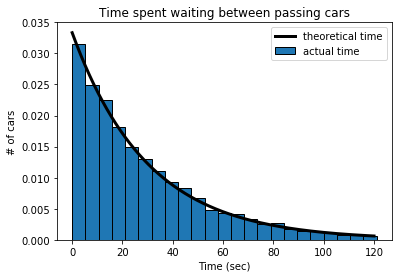

In [123]:
bins = np.linspace(0,120+1,24)
plt.hist(car_times, bins=bins, 
         density=True, edgecolor='k', label='actual time')
plt.plot(x, car_times_theory, '-k', 
         linewidth=3,label='theoretical time')
plt.title("Time spent waiting between passing cars")
plt.xlabel('Time (sec)')
plt.ylabel('# of cars')
plt.legend()
plt.show()